no. of train images= (10000, 3, 32, 32)
no. of train labels= (10000,)
no. of test images= (1500, 3, 32, 32)
no. of test lables= (1500,)
[0 0 0 ... 4 4 4]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (No

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

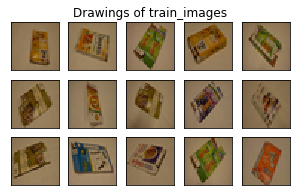

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import random
import matplotlib.pyplot as plt

train_images = np.load('/content/train_images.npy')
train_labels = np.load('/content/train_labels.npy')
test_images = np.load('/content/test_images.npy')
test_labels = np.load('/content/test_labels_.npy')

print("no. of train images=",train_images.shape)
print("no. of train labels=",train_labels.shape)
print("no. of test images=",test_images .shape)
print("no. of test lables=",test_labels.shape)

fig, ax = plt.subplots(figsize=(5,3))
ax.axis('off')
image2=train_images
imagearr2=train_images
plt.title('Drawings of train_images')
for i in list(range(0, min(len(imagearr2),(3*5)) )):      
      a = fig.add_subplot(3,5,i+1)
      imgplot = plt.imshow(imagearr2[i,:3072].reshape((32,32,3)), cmap='gray_r', interpolation='nearest')
      plt.xticks([])
      plt.yticks([])

print(train_labels)

y_test_pred=test_labels
train_labels= np_utils.to_categorical(train_labels)
test_labels= np_utils.to_categorical(test_labels)

train_images = (train_images)/255.0
test_images = (test_images)/255.0

train_images = train_images.reshape(train_images.shape[0], 32, 32,3).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 32, 32,3).astype('float32')


model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape=( 32, 32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary()) 

model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=30, batch_size=200)

score = model.evaluate(test_images, test_labels, verbose=0)

print('Accuarcy: {:0.2f}%'.format(score[1] * 100))

#save the model
model.save('keras.h5')

#convert the model into .json file
!pip install tensorflowjs

!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/
!zip -r model.zip model 
from google.colab import files
files.download('model.zip')
